# **Part 1: Python Coding**

In [ ]:
def sum_of_even_and_count_of_odd(numbers: list[int]) -> tuple[int, int]:
  sum_even = 0
  count_odd = 0
  for i in numbers:
    if i % 2 == 0 :
      sum_even += i
    else :
      count_odd += 1
  return sum_even, count_odd



numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sum_of_even_and_count_of_odd(numbers)


(30, 5)

In [ ]:
def sort_students_by_name(students: list[tuple[str, int]]) -> list[str]:
  #make all names capitalized for properly alphabetical sort
  students = [(name.capitalize(), score) for name, score in students]
  students_sorted = sorted(students, key=lambda x: x[0])
  names_sorted = [student[0] for student in students_sorted]
  return names_sorted


students = [('Alice', 85), ('alase', 72), ('Charlie', 90), ('David', 78)]
sort_students_by_name(students)

['Alase', 'Alice', 'Charlie', 'David']

In [ ]:
def max_product(nums: list[int]) -> int:
  first_max_value = max(nums)
  #create new list from 'nums' without all 'first_max_value' elements
  list_without_max_elements = [x for x in nums if x != first_max_value]
  #check is a new list contains any elements
  if len(list_without_max_elements) > 0:
    second_unique_max_value = max(list_without_max_elements)
    return second_unique_max_value*first_max_value
  else:
    #Error happens when inputed list contains just same elements
    return print("ERROR: inputed list doesn't contain two DISTINCT values")


nums = [3, 4, 5, 2]
print(max_product(nums))

nums2 = [3, 3, 3, 3]
max_product(nums2)

20
ERROR: inputed list doesn't contain two DISTINCT values


# **Part 2: Data analysis**

In [ ]:
import pandas as pd

# Sample real estate data
data = {
    'price': [300000, 450000, 600000, 350000, 800000],
    'bedrooms': [3, 4, 3, 2, 4],
    'bathrooms': [2, 3, 2.5, 1.5, 3],
    'sqft_living': [2000, 3000, 2500, 1500, 3500],
    'sqft_lot': [5000, 6000, 5500, 4000, 7000],
    'floors': [2, 1, 1.5, 1, 2],
    'condition': [3, 4, 3, 2, 5],
    'grade': [7, 8, 7, 6, 9],
    'yr_built': [2000, 2005, 1998, 2010, 2015],
    'zipcode': [98101, 98102, 98103, 98104, 98105]
}


df = pd.DataFrame(data)
#change some column types for more logical
df['zipcode'] = df['zipcode'].astype(str)
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,300000,3,2.0,2000,5000,2.0,3,7,2000,98101
1,450000,4,3.0,3000,6000,1.0,4,8,2005,98102
2,600000,3,2.5,2500,5500,1.5,3,7,1998,98103
3,350000,2,1.5,1500,4000,1.0,2,6,2010,98104
4,800000,4,3.0,3500,7000,2.0,5,9,2015,98105


In [ ]:
#Check for columns with missing data
columns_list_missing_values =  [x for x in df.isnull().sum() if x > 0]
if len(columns_list_missing_values) > 0:
  print("Columns with missing values:", columns_list_missing_values)
else:
  print("Any columns with missing data")

Any columns with missing data


In [ ]:
#simple example where all missed values in columns which type is int64 replaced with median value of this column
for column in columns_list_missing_values:
  if df[column].dtype=='int64' and df[column].isnull().any() == 'TRUE':
    df[column].fillna(df[column].median(), inplace=True)

In [ ]:
#Compute summary statistics of numeric columns
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,5.000000,5.00000,5.00000,5.000000,5.000000,5.0,5.000000
mean,500000.000000,3.20000,2.40000,2500.000000,5500.000000,1.5,2005.600000
std,203100.960116,0.83666,0.65192,790.569415,1118.033989,0.5,7.021396
min,300000.000000,2.00000,1.50000,1500.000000,4000.000000,1.0,1998.000000
25%,350000.000000,3.00000,2.00000,2000.000000,5000.000000,1.0,2000.000000
50%,450000.000000,3.00000,2.50000,2500.000000,5500.000000,1.5,2005.000000
75%,600000.000000,4.00000,3.00000,3000.000000,6000.000000,2.0,2010.000000
max,800000.000000,4.00000,3.00000,3500.000000,7000.000000,2.0,2015.000000


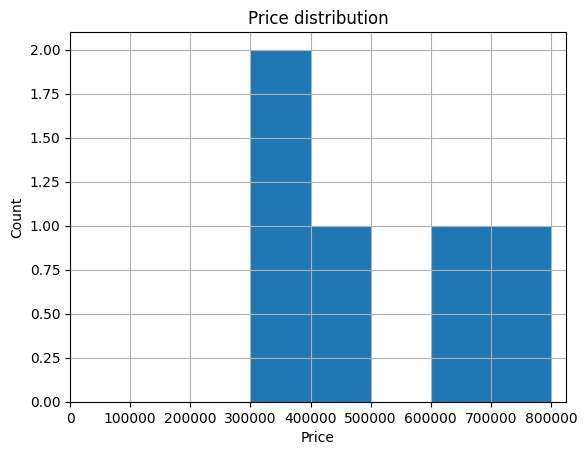

In [ ]:
#Visualize the distribution of 'price' using a histogram
import matplotlib.pyplot as plt


# Create histogram
plt.figure()
plt.hist(df['price'], bins=5)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid()
plt.xlim(0)
plt.show()

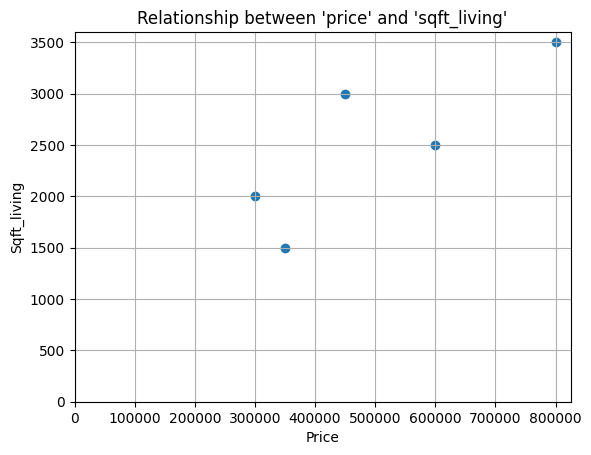

In [ ]:
# Explore the relationship between 'price' and 'sqft_living' using a scatter plot
plt.figure()
plt.scatter(df['price'], df['sqft_living'])
plt.title("Relationship between 'price' and 'sqft_living'")
plt.xlabel('Price')
plt.ylabel('Sqft_living')
plt.xlim(0)
plt.ylim(0)
plt.grid()
plt.show()

The scatter plot illustrates a strong positive correlation between price and sqft_living, suggesting that as the of the living area increases, the price tends to rise consistently. Indicated a strong linear relationship. However, there are slight deviations, indicating potential influence from other factors on housing prices. The amount of data is insufficient to make precise conclusions of this relation.

# **Part 3. SQL**


 1. Write a SQL query to retrieve the names of all employees along with their corresponding department names. If an employee is not assigned to any department, display 'Not Assigned' as the department name.

```
SELECT e.employee_name, COALESCE(d.department_name, 'Not Assigned') AS department_name
FROM employees e
LEFT JOIN departments d ON e.department_id = d.department_id;
```
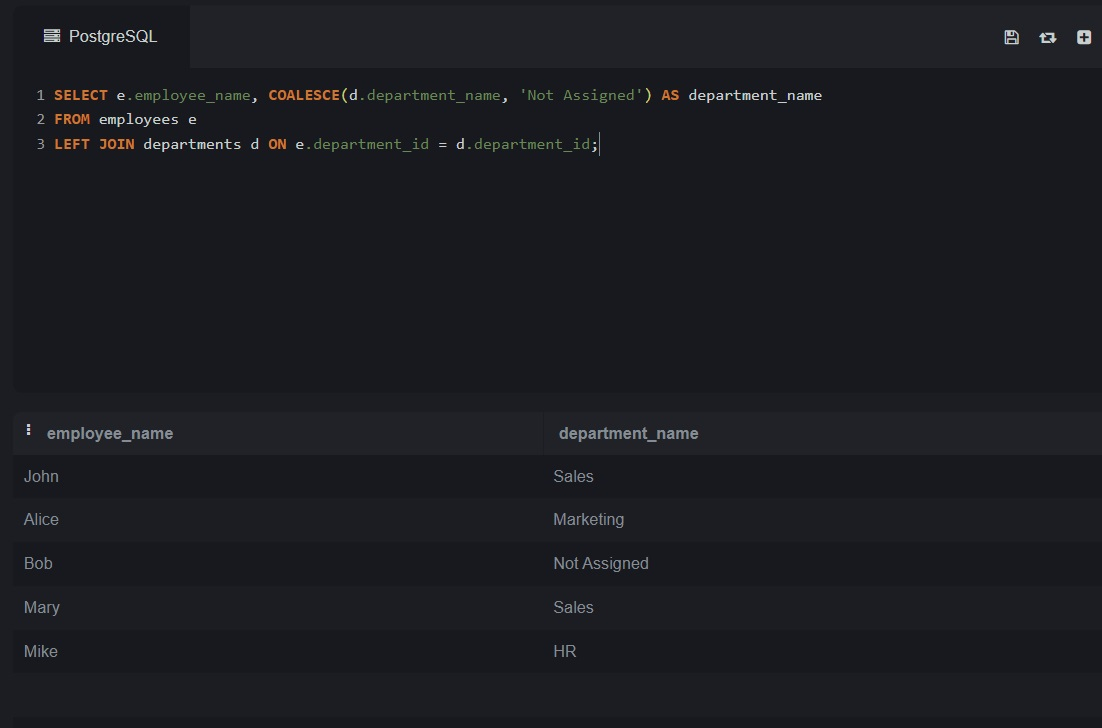

2. Using same data frames, write a SQL query to calculate the average number of employees per department.

In my opinion, the task is not logical because the average of a number is equal to the number itself(average of count = count)

If we take the request literally, then the request will be like this:


```
SELECT d.department_name, AVG(e.num_employees) AS avg_employees
FROM departments d
LEFT JOIN (
    SELECT department_id, COUNT(employee_id) AS num_employees
    FROM employees
    GROUP BY department_id
) e ON d.department_id = e.department_id
GROUP BY d.department_name
ORDER BY avg_employees DESC
```

If we simplify the query in a logical way and ask for the number of employees in each department, then the query will be like this:

```
SELECT d.department_name, COUNT(e.employee_id) AS total_employees
FROM departments d
LEFT JOIN employees e ON d.department_id = e.department_id
GROUP BY d.department_name
ORDER BY total_employees DESC
```

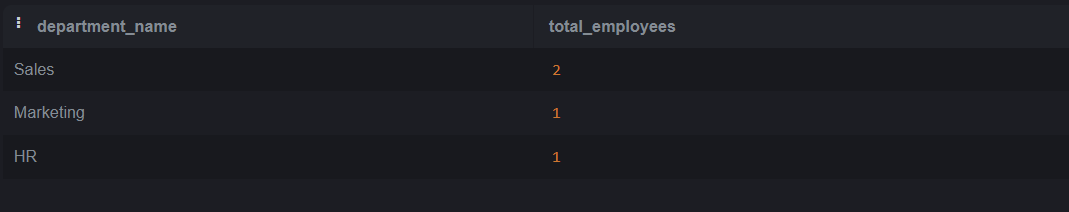

# **Part 4. Regression**

**Read, Visualize Data and Initial Data Analysis**

In [ ]:
import pandas as pd
#read data and show data
data = pd.read_csv("HouseListings-Top45Cities-10292023-kaggle.csv", encoding="latin-1")

print(data.columns)
data.info()
data.head(5)

Index(['City', 'Price', 'Address', 'Number_Beds', 'Number_Baths', 'Province',
       'Population', 'Latitude', 'Longitude', 'Median_Family_Income'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [ ]:
#summary statistics
data.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.576800e+04,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,9.432963e+05,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,1.020110e+06,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [ ]:
#Check for None values
data.isnull().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [ ]:
#check for 0 values count (Number_Baths and Number_Beds fields)
print(" Rows count where Number_Beds = 0: ",(data['Number_Beds'] == 0).sum(),
      "\n Rows count where Number_Baths = 0: " ,(data['Number_Baths'] == 0).sum(),
      "\n Rows count where both fields = 0: " ,((data['Number_Beds'] == 0) & (data['Number_Baths'] == 0)).sum())

 Rows count where Number_Beds = 0:  769 
 Rows count where Number_Baths = 0:  658 
 Rows count where both fields = 0:  601


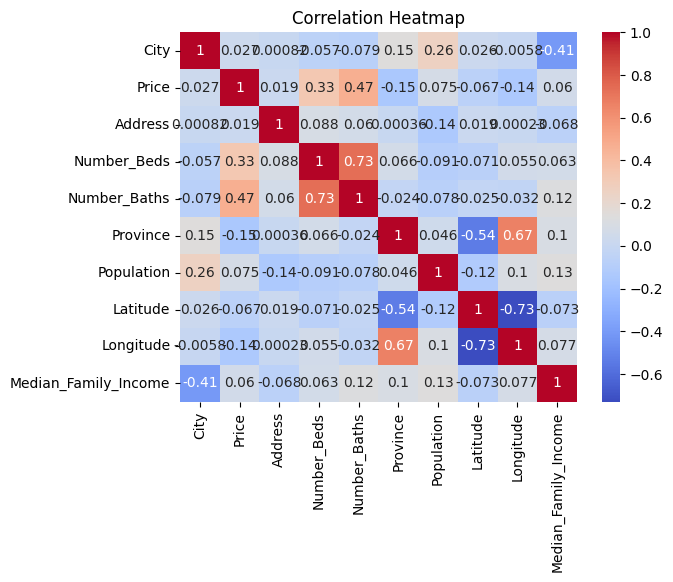

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data2=data.copy()
le  = LabelEncoder()

#made temporary dataset to encode and show with not numerical data
data2['City'] = le.fit_transform(data2['City'])
data2['Province'] = le.fit_transform(data2['Province'])
data2['Address'] = le.fit_transform(data2['Address'])

#Show fields correlation
plt.figure()
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

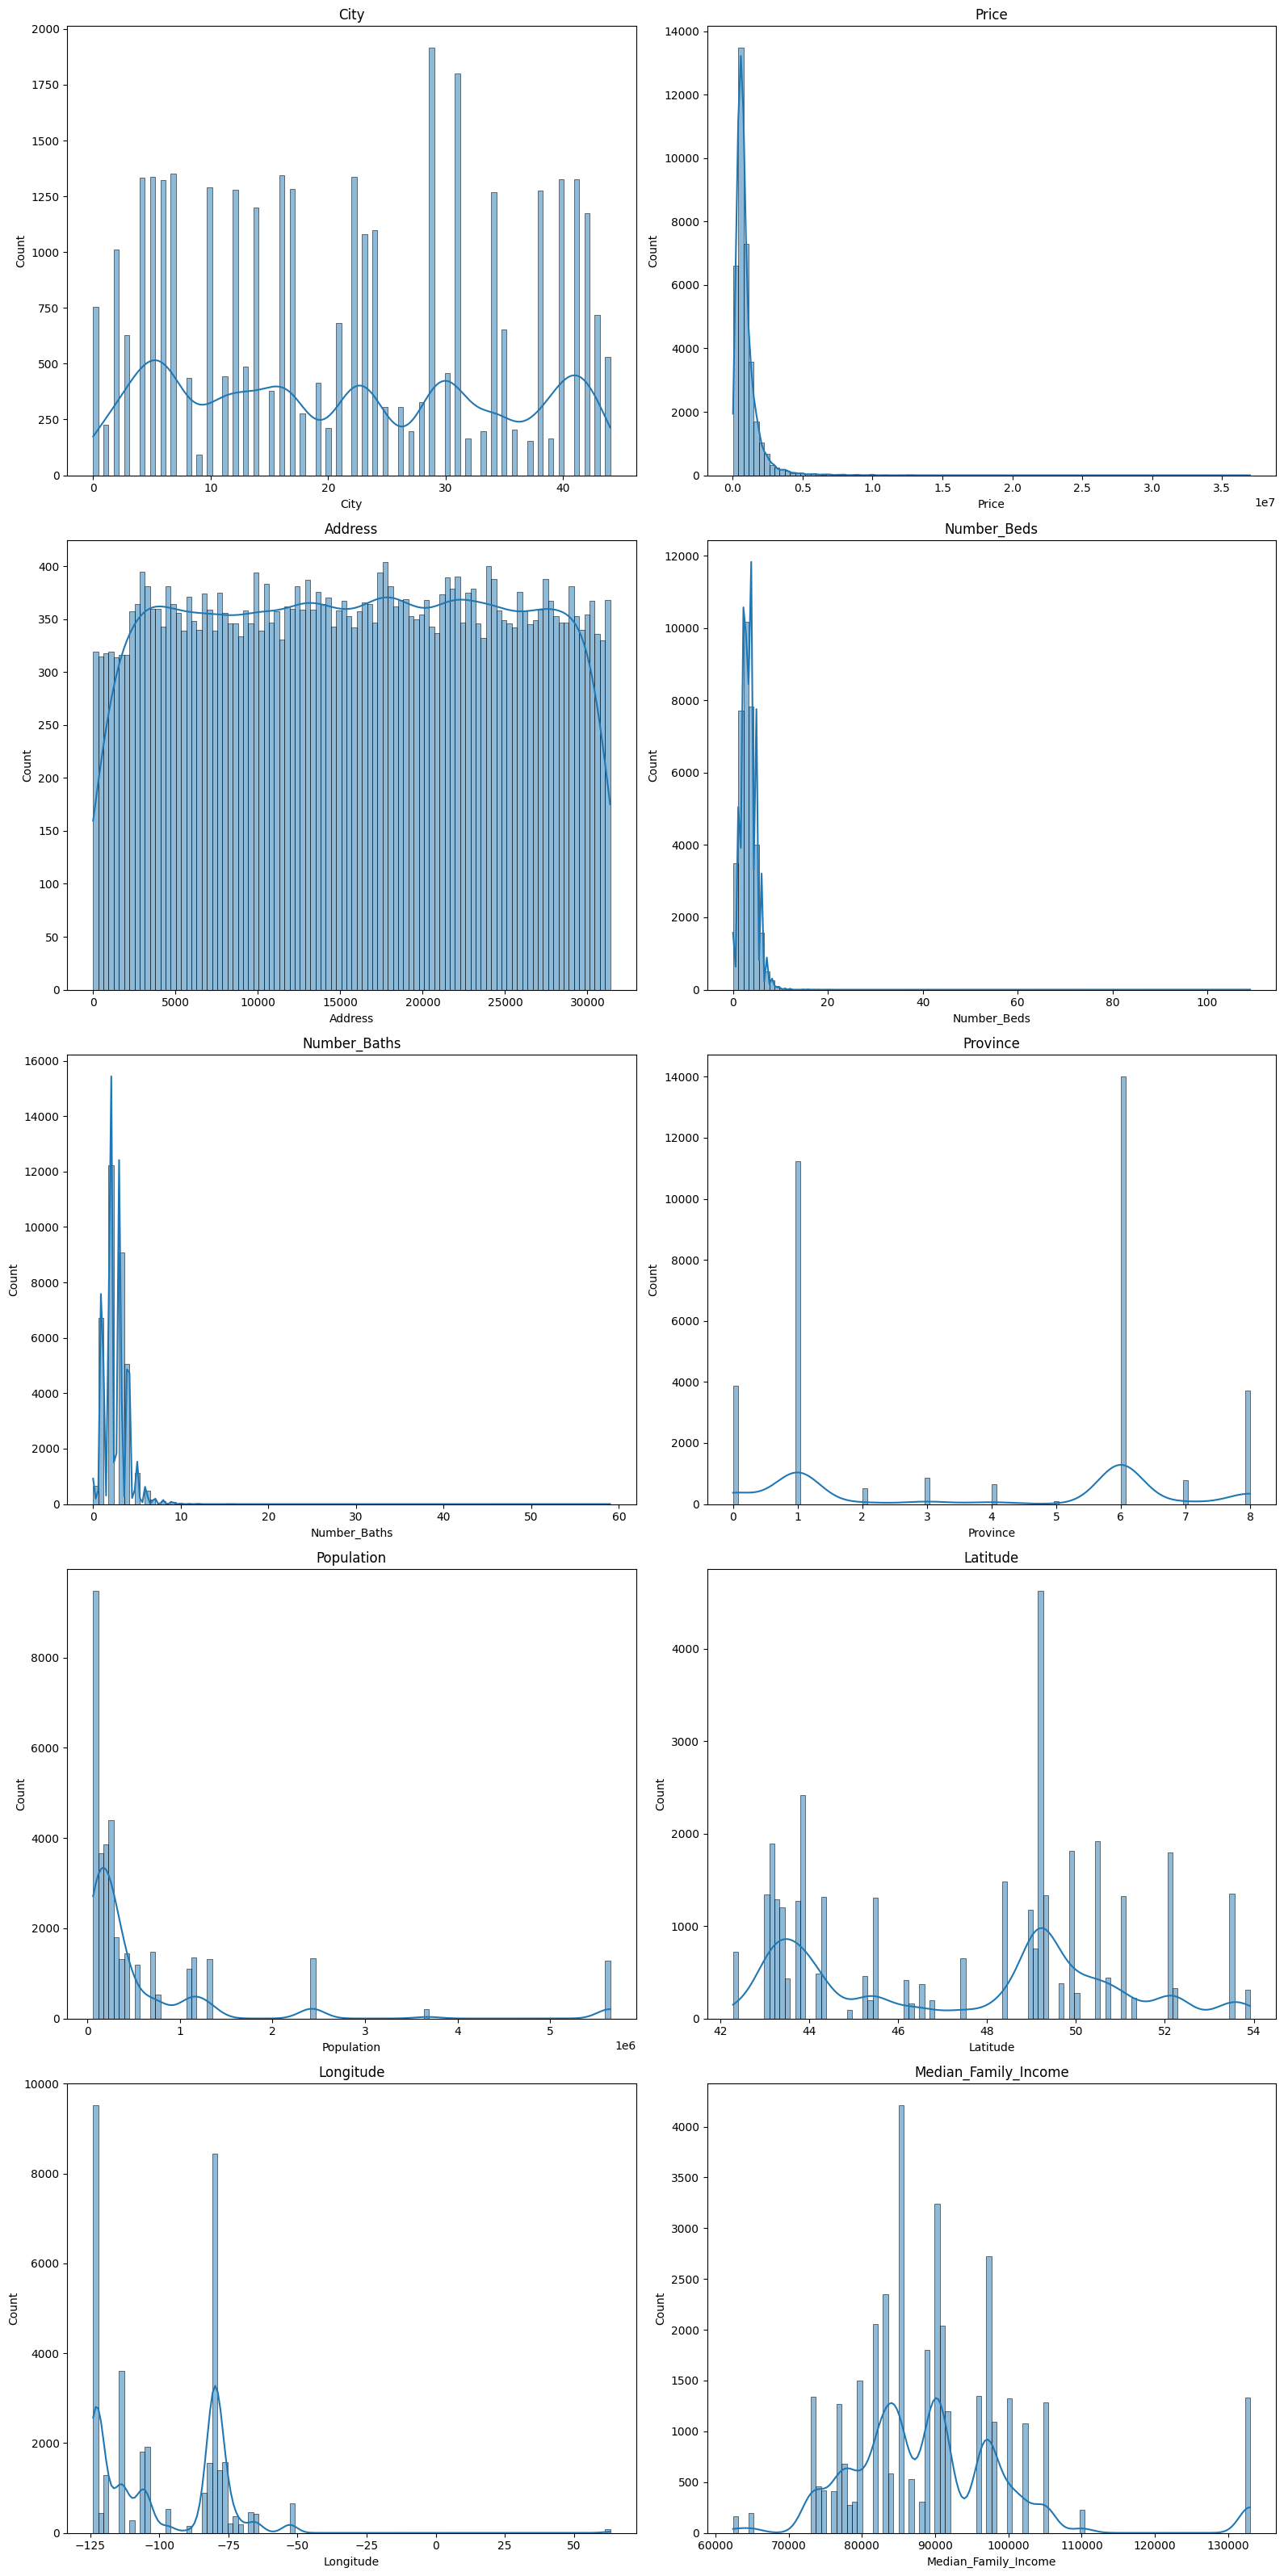

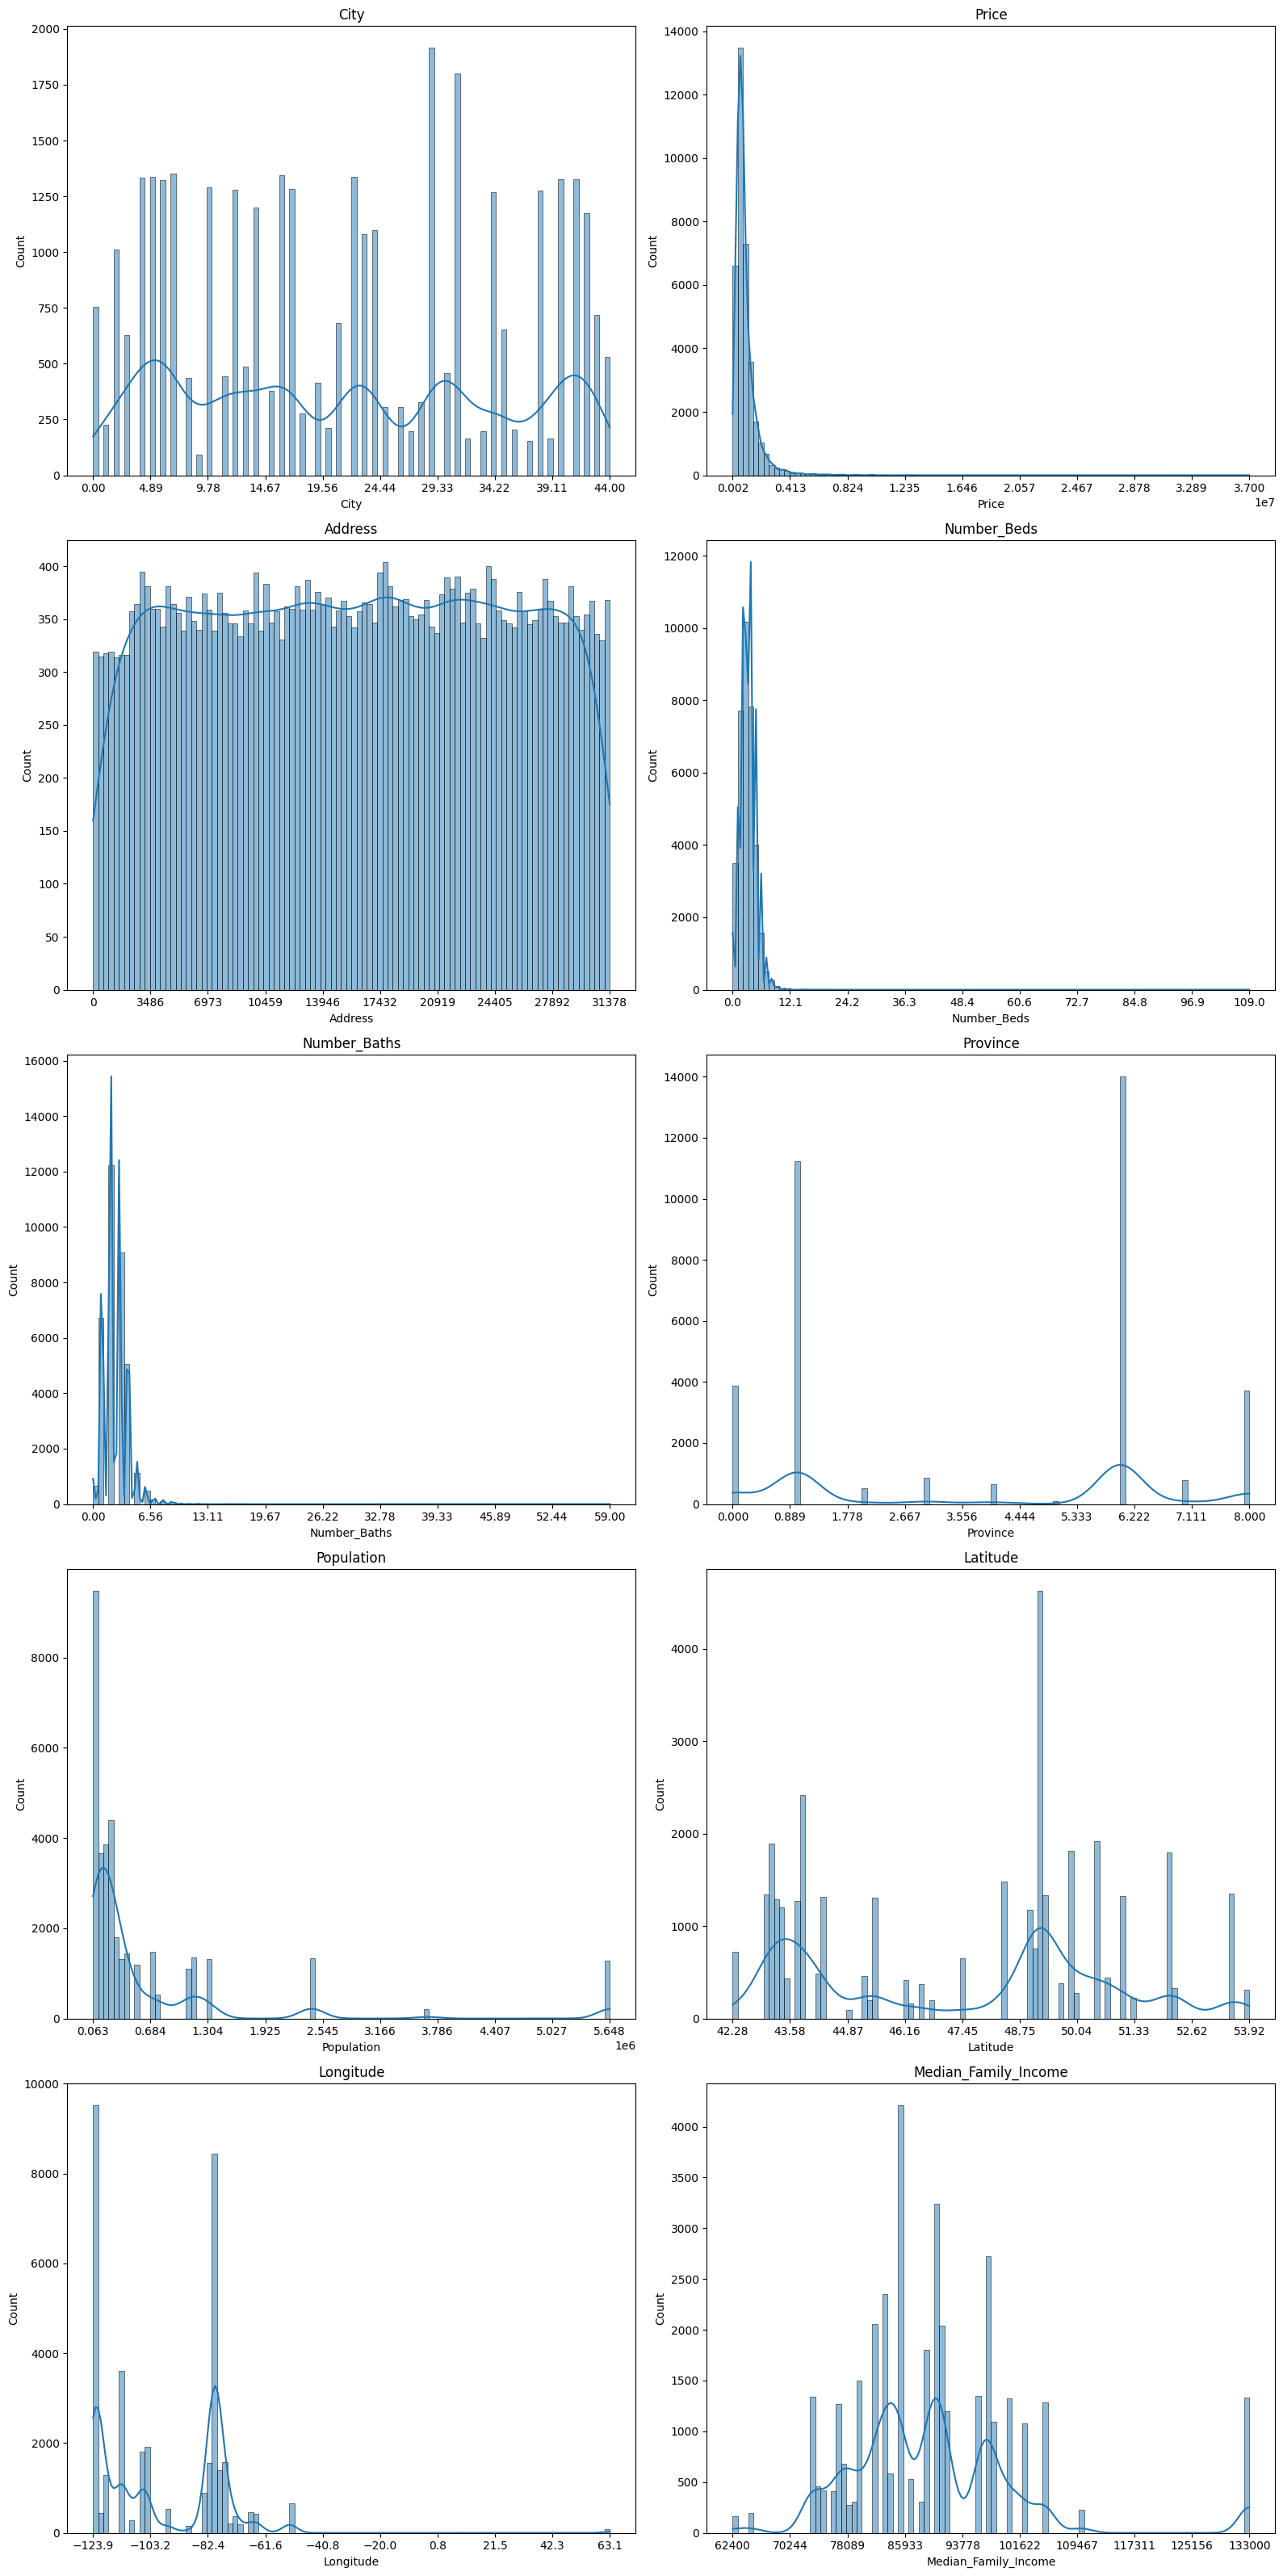

In [ ]:
# Distribution of values for each field
import numpy as np

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 32))
for i, column in enumerate(data2.columns):
    sns.histplot(data2[column], kde=True, bins=100, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(column)
    xticks = plt.xticks()[0]
    yticks = plt.yticks()[0]
    new_xticks = np.linspace(min(xticks), max(xticks), 10)  # Пример: 10 новых точек на оси X
    new_yticks = np.linspace(min(yticks), max(yticks), 10)
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 32))
for i, column in enumerate(data2.columns):
    sns.histplot(data2[column], kde=True, bins=100, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(column)

    min_value = data2[column].min()
    max_value = data2[column].max()
    new_xticks = np.linspace(min_value, max_value, 10)

    axes[i//2, i%2].set_xticks(new_xticks)

plt.tight_layout()
plt.show()

As we can see dataset contains **35768** rows and **10** columns.  
No None values were found in the dataset, but there are 0 values in the **Number_Beds** and **Number_Baths** fields. The number of rows where both fields equal 0 is **601**, which indicates that the dataset contains dirty data.

You can see from the correlation heatmap of the fields, that the most significant features influencing the price are **Number_Beds** and **Number_Baths**, while the least significant one is the **Address**.

According to the distribution plots of each field, the data is **not normally distributed** and contains a large number of outliers.

The initial quantity and quality of features is not enough to build an accurate price prediction model.

**Split, Preprocess Data**  

In [ ]:
#Split data 80% for train and 20% for test
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Price'])
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
import re
#Function for extract some additional data and clean Address field
def upper_one_type_cleaned(address):
    #convert the address to uppercase
    address = address.upper()
    #convert all street types to one format
    address = re.sub(r'\bSTREET\b|\bSTR\b|\bST\b|\bSTR\.\b|\bST\.\b', 'ST', address)
    address = re.sub(r'\bAVENUE\b|\bAVE\b|\bAV\b|\bAV\.\b|\bAVE\.\b', 'AV', address)
    address = re.sub(r'\bHILL\b|\bHL\b|\bHL\.\b', 'HL', address)
    address = re.sub(r'\bBOULEVARD\b|\bBLVD\b|\bBLV\b|\bBLVD\.\b|\bBLV\.\b', 'BL', address)
    address = re.sub(r'\bHIGHWAY\b|\bHWY\b|\bHW\b', 'HW', address)
    address = re.sub(r'\bPLACE\b|\bPL\b|\bPL\.\b', 'PL', address)
    address = re.sub(r'\bDRIVE\b|\bDR\.\b', 'DR', address)
    address = re.sub(r'\bROW\b|\bRW\b|\bRW\.\b', 'RW', address)
    address = re.sub(r'\bROAD\b|\bRD\b|\bRD\.\b', 'RD', address)
    address = re.sub(r'\bCOURT\b|\bCTY\b|\bCT\b|\bCT\.\b', 'CT', address)
    address = re.sub(r'\bWAY\b|\bWY\b', 'WY', address)
    address = re.sub(r'\bALLEY\b|\bAL\b|\bALL\.\b|\bALL\b', 'AL', address)
    address = re.sub(r'\bSQ\b|\bSQUARE\b|\bPARK\b|\bSQ\.\b', 'SQ', address)

    #Delete all numbers sequence which stay after # (listing number)
    house_numbers = re.findall(r'#\d+ -', address)
    for house_number in house_numbers:
        address = address.replace(house_number, '')
    #We need just last sequence numbers if isset sequences numbers > 1(first sequence show number of listing)
    all_numbers = re.findall(r'\d+', address)
    if len(all_numbers) > 1:
        address = re.sub(r'\b\d+\b', '', address, 1)
    #Delete unnecessary spaces
    address = ' '.join(address.split())
    return address

def extract_street_type(address):
    #Return street type if it found
    street_types = ['AV', 'ST', 'HL', 'WY', 'HW', 'PL', 'DR', 'RW', 'RD', 'CT', 'WY',  'BL','AL', 'SQ']
    address_parts = address.split()
    for part in reversed(address_parts):
        if part.upper() in street_types:
            return part.upper()
    return None

def extract_house_number(address):
    #Return integer number of house if it found
    house_number = re.findall(r'^\D*(\d+)', address)
    if house_number:
        return int(house_number[0])
    else:
        return None

def clean_address_str_name(address):
    #Delete type from address and 'the'
    address = re.sub(r'\b(?!UNIT)(AV|ST|HL|WY|HW|PL|DR|RW|RD|CT|WY|BL|AL|SQ|THE)\b', '', address)
    #Delete house number
    address = re.sub(r'^[^a-zA-Z]*(\d+)[^a-zA-Z]*', '', address)
    return address.strip()

In [ ]:
#Show how it works
print(upper_one_type_cleaned('#318 -20 SOUTHPORT ST'))
print(extract_street_type('20 SOUTHPORT ST'))
print(extract_house_number('20 SOUTHPORT ST'))
print(clean_address_str_name('20 SOUTHPORT ST'))

20 SOUTHPORT ST
ST
20
SOUTHPORT


In [ ]:
#Add new fields which created in previous cell
X_train['Address_cleaned'],X_test['Address_cleaned'] = X_train['Address'].apply(lambda x: upper_one_type_cleaned(x)),X_test['Address'].apply(lambda x: upper_one_type_cleaned(x))
X_train['Str_type'],X_test['Str_type'] = X_train['Address_cleaned'].apply(lambda x: extract_street_type(x)),X_test['Address_cleaned'].apply(lambda x: extract_street_type(x))
X_train['Str_name'],X_test['Str_name'] = X_train['Address_cleaned'].apply(lambda x: clean_address_str_name(x)),X_test['Address_cleaned'].apply(lambda x: clean_address_str_name(x))
X_train['House_number'],X_test['House_number'] = X_train['Address_cleaned'].apply(lambda x: extract_house_number(x)),X_test['Address_cleaned'].apply(lambda x: extract_house_number(x))
X_train['House_number'].fillna(X_train['House_number'].mode()[0], inplace=True)
X_test['House_number'].fillna(X_train['House_number'].mode()[0], inplace=True)
#remove excessive emissions from Number_Beds,Number_Baths
threshold = X_train['Number_Beds'].quantile(0.95)

X_train.loc[X_train['Number_Beds'] > 30, 'Number_Beds'] = threshold
X_train.loc[X_train['Number_Baths'] > 30, 'Number_Baths'] = threshold

X_test.loc[X_test['Number_Beds'] > 30, 'Number_Beds'] = threshold
X_test.loc[X_test['Number_Baths'] > 30, 'Number_Baths'] = threshold

#change from train and test Number_Beds,Number_Baths = 0 to median value
X_train.loc[X_train['Number_Beds'] == 0, 'Number_Beds'],X_test.loc[X_test['Number_Beds'] == 0, 'Number_Beds'] = data['Number_Beds'].median(),data['Number_Beds'].median()
X_train.loc[X_train['Number_Baths'] == 0, 'Number_Baths'],X_test.loc[X_test['Number_Baths'] == 0, 'Number_Baths']  = data['Number_Baths'].median(),data['Number_Beds'].median()

#Create some new fields from most important field and add it to train set
#field thats show total(which we have) rooms amount
X_train['Total_Rooms'] = X_train['Number_Beds'] + X_train['Number_Baths']
#ratio of the count of all rooms to the count of bedrooms
X_train['Rooms_Per_Bedroom'] = X_train['Total_Rooms'] / X_train['Number_Beds']
#ratio of the count of all rooms to the count of bathrooms
X_train['Rooms_Per_Bathroom'] = X_train['Total_Rooms'] / X_train['Number_Baths']
#ratio of count of bedrooms to the count of bathrooms
X_train['Bedrooms_Per_Bathroom'] = X_train['Number_Beds'] / X_train['Number_Baths']
#ratio of the count of bedrooms to the count of all rooms
X_train['Bedroom_Ratio'] = X_train['Number_Beds'] / X_train['Total_Rooms']
#ratio of the count of bathrooms to the count of all rooms
X_train['Bathroom_Ratio'] = X_train['Number_Baths'] / X_train['Total_Rooms']

#Create some new fields from most important field and add it to test set
#field thats show total(which we have) rooms amount
X_test['Total_Rooms'] = X_test['Number_Beds'] + X_test['Number_Baths']
#ratio of the count of all rooms to the count of bedrooms
X_test['Rooms_Per_Bedroom'] = X_test['Total_Rooms'] / X_test['Number_Beds']
#ratio of the count of all rooms to the count of bathrooms
X_test['Rooms_Per_Bathroom'] = X_test['Total_Rooms'] / X_test['Number_Baths']
#ratio of count of bedrooms to the count of bathrooms
X_test['Bedrooms_Per_Bathroom'] = X_test['Number_Beds'] / X_test['Number_Baths']
#ratio of the count of bedrooms to the count of all rooms
X_test['Bedroom_Ratio'] = X_test['Number_Beds'] / X_test['Total_Rooms']
#ratio of the count of bathrooms to the count of all rooms
X_test['Bathroom_Ratio'] = X_test['Number_Baths'] / X_test['Total_Rooms']

#remove old Address field from test and train set
X_test = X_test.drop(columns=['Address'])
X_train = X_train.drop(columns=['Address'])

In [ ]:
#show new data
X_train.head(5)

,City,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income,Address_cleaned,Str_type,Str_name,House_number,Total_Rooms,Rooms_Per_Bedroom,Rooms_Per_Bathroom,Bedrooms_Per_Bathroom,Bedroom_Ratio,Bathroom_Ratio
21058,Kingston,4,2,Ontario,136685,44.2313,-76.4810,83000.0,983 MAYFAIR CRESCENT,None,MAYFAIR CRESCENT,983.0,6,1.500000,3.00,2.00,0.666667,0.333333
14465,Windsor,2,1,Ontario,306519,42.2833,-83.0000,82000.0,442 ELLIOTT,None,ELLIOTT,442.0,3,1.500000,3.00,2.00,0.666667,0.333333
11420,St. Catharines,3,2,Ontario,242460,43.1833,-79.2333,77000.0,41 QUEEN MARY DR,DR,QUEEN MARY,41.0,5,1.666667,2.50,1.50,0.600000,0.400000
21766,Guelph,2,2,Ontario,144356,43.5500,-80.2500,97000.0,WYNDHAM ST S UNIT# 313,ST,WYNDHAM S UNIT# 313,313.0,4,2.000000,2.00,1.00,0.500000,0.500000
17881,Barrie,5,4,Ontario,154676,44.3711,-79.6769,97000.0,54 PRINCE WILLIAM WY,WY,PRINCE WILLIAM,54.0,9,1.800000,2.25,1.25,0.555556,0.444444


In [ ]:
#encode not numerical data
X_train['City'] = le.fit_transform(X_train['City'])
X_train['Province'] = le.fit_transform(X_train['Province'])
X_train['Address_cleaned'] = le.fit_transform(X_train['Address_cleaned'])
X_train['Str_type'] = le.fit_transform(X_train['Str_type'])
X_train['Str_name'] = le.fit_transform(X_train['Str_name'])

X_test['City'] = le.fit_transform(X_test['City'])
X_test['Province'] = le.fit_transform(X_test['Province'])
X_test['Address_cleaned'] = le.fit_transform(X_test['Address_cleaned'])
X_test['Str_type'] = le.fit_transform(X_test['Str_type'])
X_test['Str_name'] = le.fit_transform(X_test['Str_name'])

In [ ]:
#encode not numerical data
X_train['City'] = le.fit_transform(X_train['City'])
X_train['Province'] = le.fit_transform(X_train['Province'])
X_train['Address_cleaned'] = le.fit_transform(X_train['Address_cleaned'])
X_train['Str_type'] = le.fit_transform(X_train['Str_type'])
X_train['Str_name'] = le.fit_transform(X_train['Str_name'])

X_test['City'] = le.fit_transform(X_test['City'])
X_test['Province'] = le.fit_transform(X_test['Province'])
X_test['Address_cleaned'] = le.fit_transform(X_test['Address_cleaned'])
X_test['Str_type'] = le.fit_transform(X_test['Str_type'])
X_test['Str_name'] = le.fit_transform(X_test['Str_name'])

In [ ]:
#Scale some numerical fields
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

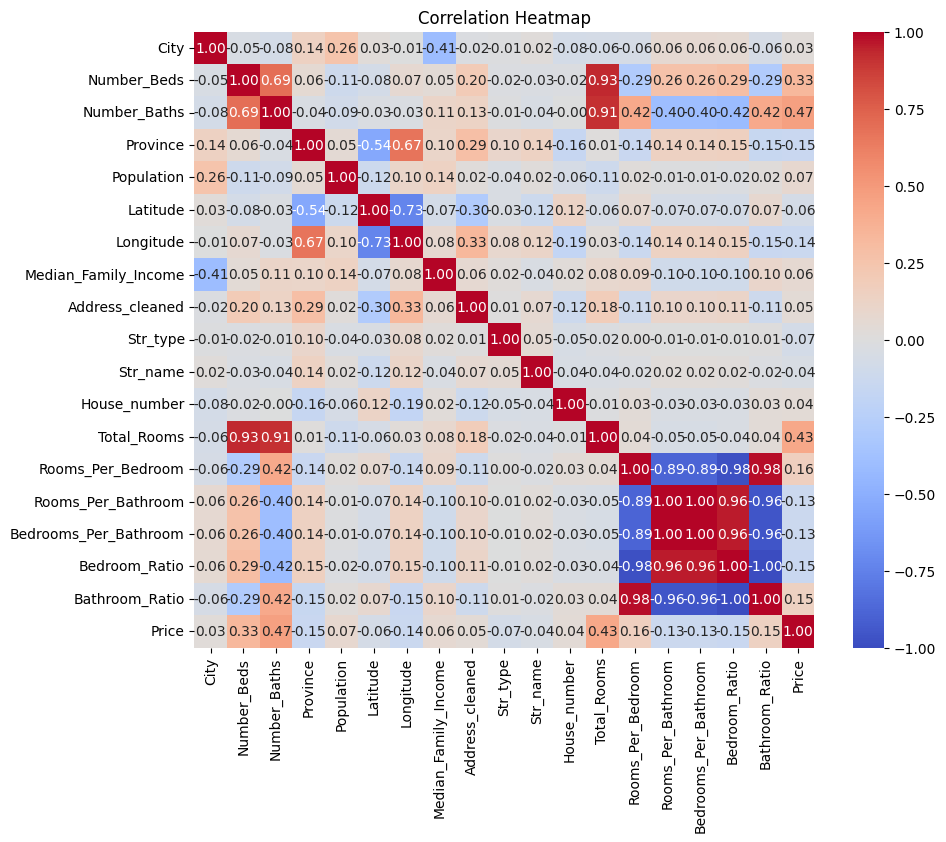

In [ ]:
#connect for see correaltion heatmap with new features
train_data = pd.concat([X_train, y_train], axis=1)

correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Build and Evaluate regression models**

In [ ]:
#LinearRegression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import numpy as np
linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train_scaled, y_train)

y_pred_lin = linear_reg_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lin)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Root Mean Squared Error: 775370.2228750146
R-squared: 0.36624038231140543


In [ ]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=21)

rf_regressor.fit(X_train_scaled, y_train)

y_pred_rf = rf_regressor.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)

Root Mean Squared Error: 810515.8947741981
R-squared: 0.3074846594080263


In [ ]:
#xgboost model
import xgboost as xgb

xgb_model = xgb.XGBRegressor(colsample_bytree = 1.0, learning_rate = 0.1, max_depth = 3, n_estimators = 480, subsample = 0.9)

xgb_model.fit(X_train_scaled, y_train)

y_pred_xg = xgb_model.predict(X_test_scaled)

mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test, y_pred_xg)
print("Root Mean Squared Error:", rmse_xg)
print("R-squared:", r2_xg)

Root Mean Squared Error: 683832.8307489344
R-squared: 0.5070461975231894


In [ ]:
#GradientBoostingRegressor model
from sklearn.ensemble import GradientBoostingRegressor

gradient_model = GradientBoostingRegressor()
gradient_model.fit(X_train_scaled, y_train)

y_pred_gb = gradient_model.predict(X_test_scaled)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Root Mean Squared Error:", rmse_gb)
print("R-squared:", r2_gb)

Root Mean Squared Error: 671766.7284736902
R-squared: 0.5242888766864593


**Conclusion:**

During data preprocessing, **additional features** were added, which were obtained by transforming the original, uninformative **Address** feature. Several features were also added by converting the most significant features **Number_Beds**, **Number_Baths**.

Correlation coefficients with price show that most of the new fields turned out to be much **more informative** than some of the original fields.

Next, 4 regression models were built. The best values ​​were shown by **xgboost** and **GradientBoostingRegressor**. Root Mean Squared Error and R-squared error metrics were used to assess accuracy.
The R-squared error slightly exceeded **0.5**, which is considered a normal model. But not great.

Price prediction accuracy can be improved by **tuning parameters** for best models. For this you can use **GridSearchCV** at 5%-10%.
Also more complex models can be build.

To significantly resolve the issue with the quality of predictions, it is necessary to **expand the dataset** with additional significant real estate data.

**Clearing** the original dataset from **outliers** allowed us to train models with R-squared error of more than 0.7(tested), which is high accuracy.


# **Hyperparameters tuning**


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


rf_regressor = RandomForestRegressor(max_features = 'sqrt')
#create interval of model Hyperparameters
param_dist = {
    'n_estimators': randint(300, 701),
    'max_depth': randint(10, 51),
    'min_samples_split': randint(1, 4),
    'min_samples_leaf': randint(1, 4)
}

#create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=21, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

#show optimal params
optimal_params = random_search.best_params_
print("Optimal params:", optimal_params)

best_score = np.sqrt(-random_search.best_score_)
print("Best RMSE score found:", best_score)

#train model with best params
best_model = random_search.best_estimator_
y_pred_rf_tuned = best_model.predict(X_test_scaled)


mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)


print("Mean Absolute Error :", mae_rf_tuned)
print("R-squared :", r2_rf_tuned)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
65 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Optimal params: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 574}
Best RMSE score found: 742974.2923243955
Mean Absolute Error : 304983.1669293967
R-squared : 0.5314271735013226


In [ ]:
#LinearRegression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

linear_reg_model2 = LinearRegression()
#create grid of model Hyperparameters
param_grid = {
    'fit_intercept': [True, False]
}

#create GridSearchCV
grid_search = GridSearchCV(estimator=linear_reg_model2, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

optimal_linear_params = grid_search.best_params_
print("Optimal params:", optimal_linear_params)

best_score_linear = np.sqrt(-grid_search.best_score_)
print("Best RMSE score found:", best_score_linear)

y_pred_lin = best_model.predict(X_test_scaled)
mse_lin_tun = mean_squared_error(y_test, y_pred_lin)
rmse_lin_tun = np.sqrt(mse_lin_tun)
r2_lin_tun = r2_score(y_test, y_pred_lin)
print("Root Mean Squared Error:", rmse_lin_tun)
print("R-squared:", r2_lin_tun)

Optimal params: {'fit_intercept': True}
Best RMSE score found: 849943.7978775327
Root Mean Squared Error: 666707.5705107938
R-squared: 0.5314271735013226


About **Hyperparameters**:

1. **RandomForestRegressor** param_grid hyperparameters:

*n_estimators* - This parameter determines the number of trees in the forest. Increasing this parameter can lead to improved model accuracy by reducing variance, as more trees in the forest can enhance the model's generalization ability. However, too large a value may cause overfitting.

*max_depth* - This parameter sets the maximum depth of each tree in the forest. Increasing it can result in more complex models capable of capturing more intricate patterns in the data. However, excessively deep trees may lead to overfitting.

*min_samples_split* - This parameter determines the minimum number of samples required to split an internal node. Increasing it can help reduce overfitting by increasing the number of samples in each leaf.

*min_samples_leaf* - This parameter sets the minimum number of samples required to be in a leaf node. Increasing it can also aid in reducing overfitting by increasing the minimum leaf size.

*max_features* - This parameter determines the number of features to consider when looking for the best split. Increasing it can introduce more randomness and enhance the model's generalization ability. Set to '*sqrt*' for reducing parameter selection time. Also can be tested numeric value. For regression models always use '*sqrt*', for classification - '*log*'. Also can be set to *None* - thats parameter used to increase performance.

2. **LinearRegression** hyperparameters:

*fit_intercept* -  This parameter determines whether to fit the intercept term. When set to True, the model includes an intercept term. This can be useful if the dependent variable does not pass through the origin.

We have significantly improved the accuracy of the model:
RandomForestRegressor **0.3074846594080263 -> 0.5314271735013226**
LinearRegression  **0.36624038231140543 -> 0.5314271735013226**

**Conclusion** : Changing these parameters can impact the performance and generalization ability of regression models. It's important to carefully tune their values to achieve the optimal balance between accuracy and overfitting. In real tasks, selecting parameters can take a lot of time and use many more hyperparameters.
Also, in real applied tasks, need to understanding what is the **optimization criterion** and maintaining the necessary balance between accuracy and performance.

# **Save\Load\Use model**

In [ ]:
#install package
!pip install joblib

In [ ]:
import joblib
#save trained RandomForestRegressor model in random_forest_model.pkl file
joblib.dump(best_model, 'random_forest_model.pkl')
#load model
loaded_model = joblib.load('random_forest_model.pkl')
#predict price for random object(after the same transformations as with train data)
object_predict = np.array([0.03788771, -0.89087948, -0.43554603, -0.99949514, -0.49644842,
        0.53027969, -1.09644139, -0.62894, -1.20731044, -0.16136319,
       -0.48011197,  0.20638393, -0.73888714,  0.72396132, -0.69851072,
       -0.69851072, -0.77620983,  0.77620983]).reshape(1, -1)

predicted_price = loaded_model.predict(object_predict)
print("Predicted price:", predicted_price)

Predicted price: [808383.84009898]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
